In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import HistGradientBoostingRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNet, Ridge, Lasso
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer

## Import data

In [29]:
train = pd.read_csv('/kaggle/input/playground-series-s4e4/train.csv')
train.drop(columns=['id'], axis=1, inplace=True)
X = train.drop(columns=['Rings'], axis=1)
y = train['Rings']

encoder = LabelEncoder()
X['Sex'] = encoder.fit_transform(X['Sex'])

Training HistGBRegressor
Training GBRegressor
Training DecisionTreeRegressor
Training ElasticNet
Training Ridge
Training Lasso


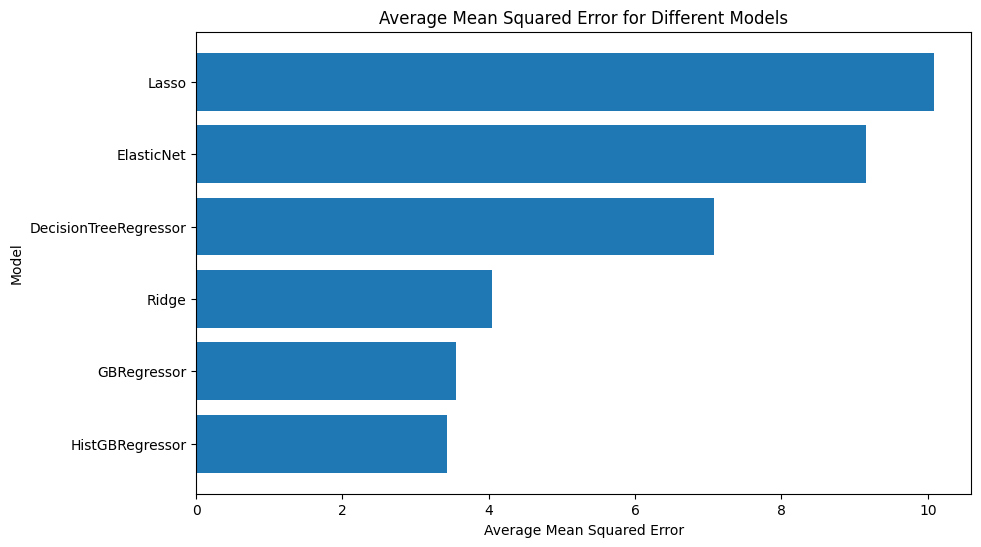

Average MSE Scores:
                   Model  Average MSE
0        HistGBRegressor     3.427723
1            GBRegressor     3.552884
4                  Ridge     4.043981
2  DecisionTreeRegressor     7.078607
3             ElasticNet     9.149135
5                  Lasso    10.088423


In [37]:
class ModelingRegression:
    """
    Class for fitting multiple models for regression
    using K folds with KFold.
    Averaging the mean squared error and comparing them in a plot.
    
    Params: 
        models: a dictionary of different ML models
        X: the specified features
        y: the specified targets
    """
    def __init__(self, models: dict, X, y):
        self.models = models
        self.X = X
        self.y = y
        self.avg_mse_scores = None
        self.model_mse_scores = None
        self.plot = None
    
    def fit_models(self):
        """Function for fitting and scoring each model over K folds"""
        # Initialize KFold
        kf = KFold(n_splits=5, shuffle=True, random_state=42)
        
        # Dictionaries to store average MSE scores and model MSE scores
        avg_mse_scores = {}
        model_mse_scores = {}
        
        # Iterate over each model
        for model_name, ModelClass in self.models.items():
            print("Training", model_name)
            
            # List to store MSE scores for each fold
            fold_mse_scores = []
            
            # Instantiate the model object
            model = ModelClass()
            
            # Iterate over each fold
            for train_index, test_index in kf.split(self.X):
                X_train, X_test = self.X.iloc[train_index], self.X.iloc[test_index]
                y_train, y_test = self.y.iloc[train_index], self.y.iloc[test_index]
        
                # Fit the model on the training data
                model.fit(X_train, y_train)
        
                # Predict targets
                y_preds = model.predict(X_test)
        
                # Calculate mean squared error for the fold
                mse_fold = mean_squared_error(y_test, y_preds)
        
                # Append MSE score for the fold to the list
                fold_mse_scores.append(mse_fold)
                
            # Calculate average MSE score across folds for the model
            avg_mse_score = np.mean(fold_mse_scores)
            
            # Store average MSE score for the model
            avg_mse_scores[model_name] = avg_mse_score
            model_mse_scores[model_name] = fold_mse_scores
        
        self.avg_mse_scores = avg_mse_scores
        self.model_mse_scores = model_mse_scores
        self._plot_scores()
    
    def _plot_scores(self):
        """Function responsible for plotting"""
        if self.avg_mse_scores is None:
            print("Please fit models first using fit_models method.")
            return

        # Sort the models by average MSE scores
        sorted_models = sorted(self.avg_mse_scores.items(), key=lambda x: x[1])
        models, avg_mse_scores = zip(*sorted_models)

        # Plot average MSE scores for each model
        plt.figure(figsize=(10, 6))
        plt.barh(models, avg_mse_scores)
        plt.xlabel('Average Mean Squared Error')
        plt.ylabel('Model')
        plt.title('Average Mean Squared Error for Different Models')

        # Store the plot as an attribute
        self.plot = plt
    
    def show_plot(self):
        """Show the stored plot and print average MSE scores if available"""
        if self.plot is None:
            print("No plot available. Please run fit_models method first.")
            return

        # Show the plot
        self.plot.show()

        # Print average MSE scores if available
        if self.avg_mse_scores:
            scores_df = pd.DataFrame({'Model': list(self.avg_mse_scores.keys()), 
                                      'Average MSE': list(self.avg_mse_scores.values())})
            scores_df = scores_df.sort_values(by='Average MSE', ascending=True)
            print("Average MSE Scores:")
            print(scores_df)
        
if __name__ == "__main__":
    models = {
        'HistGBRegressor': HistGradientBoostingRegressor,
        'GBRegressor': GradientBoostingRegressor,
        'DecisionTreeRegressor': DecisionTreeRegressor,
        'ElasticNet': ElasticNet,
        'Ridge': Ridge,
        'Lasso': Lasso
    }
    tester = ModelingRegression(models, X, y)
    tester.fit_models()
    tester.show_plot()

Since our scoring metric is Mean Squared Error, we want the model with the lowest score